### MSCI 446 Project 

#### Project Description:

#### Project Assumptions:

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

In [109]:
#Read in data from .csv file
batterData = pd.read_csv("batterDataFile.csv") 

#Set target variable as salary
x_data = batterData[['Age', 'Pos', 'G', 'PA', 'Rbat', 'Rbaser', 'Rdp', 'Rfield', 'Rpos', 'RAA', 'WAA', 'Rrep', 'RAR', 'WAR', 'oWAR', 'dWAR', 'oRAR']]
y_data = batterData['Salary']

# Preview the first 5 lines of the loaded data 
batterData.head()

,Age,Pos,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,oWAR,dWAR,oRAR,Salary
0,31,8,86,342,2,0,0,-10,1,-7,-0.9,11,4,0.2,1.3,-1.0,14,4.00000
1,28,14,49,66,-4,0,0,-1,0,-5,-0.5,1,-4,-0.9,-0.9,-0.1,-3,0.56350
2,29,8,59,255,2,-1,2,-1,1,3,0.4,9,12,1.3,1.3,0.1,13,6.28571
3,27,9,102,447,27,-1,-2,20,-4,40,4.0,16,55,5.5,3.4,1.7,35,0.68430
4,24,15,4,8,0,-1,0,0,0,-1,-0.1,0,-1,0.0,0.0,0.0,0,0.56350


In [116]:
# Create a LinearRegression Object
lreg = LinearRegression()

x = batterData.Age
numx = x.to_numpy()
x_array = numx.reshape(-1,1)

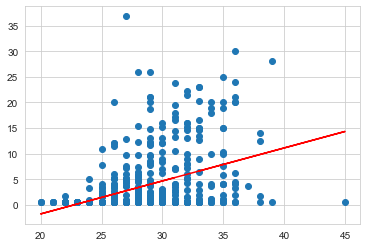

In [117]:
# Implement Linear Regression
lreg.fit(x_array,y_data)
plt.scatter(batterData.Age,batterData.Salary)
plt.plot(x_array,lreg.predict(x_array),'r')

In [112]:
lreg.fit(x_data,y_data)

LinearRegression()

In [113]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)

 The estimated intercept coefficient is -15.65 


In [114]:
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The number of coefficients used was 17 


In [115]:
# Set a DataFrame from the Features
coeff_df = pd.DataFrame(batterData.columns)
coeff_df.columns = ['Stats']

# Set a new column lining up the coefficients from the linear regression
coeff_df['Coefficient Estimate'] = pd.Series(lreg.coef_)

# Show
coeff_df

,Stats,Coefficient Estimate
0,Age,0.609479
1,Pos,0.021714
2,G,-0.081740
3,PA,0.017723
4,Rbat,-0.375828
5,Rbaser,-0.135142
6,Rdp,-1.091453
7,Rfield,0.179036
8,Rpos,-0.371407
9,RAA,0.418263


In [119]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lreg,x_data,batterData.Salary,cv=10,scoring='explained_variance')
scores

array([0.59846926, 0.48881564, 0.34063039, 0.30858147, 0.48519013,
       0.47549932, 0.30041982, 0.21395719, 0.54663452, 0.2120951 ])

In [120]:
# Grab the output and set as X and Y test and train data sets!
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_data,batterData.Salary)

In [122]:
# Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(469, 17) (157, 17) (469,) (157,)


In [123]:
# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression()

In [124]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [125]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  %np.mean((Y_train - pred_train) **2) )
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) **2) )

Fit a model X_train, and calculate MSE with Y_train: 18.66
Fit a model X_train, and calculate MSE with X_test and Y_test: 13.26
